In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from google.colab import files

from PIL import Image, ImageDraw, ImageFilter

from scipy import ndimage, misc

In [ ]:
file = files.upload()

Saving images.jpg to images.jpg


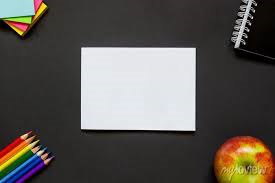

In [ ]:
image_orig = Image.open('images.jpg')
image_orig

In [ ]:
pxls = image_orig.load()
data_rgb = np.array([[int((pxls[x, y][0] + pxls[x, y][1] + pxls[x, y][2]) / 3) for x in range(image_orig.size[0])] for y in range(image_orig.size[1])])
data_rgb

array([[205, 205, 205, ...,  13,  13,  13],
       [205, 205, 205, ...,  11,  11,  11],
       [205, 205, 205, ...,   8,   8,   8],
       ...,
       [106, 135, 143, ...,  38,  26,  19],
       [158, 139, 111, ...,  33,  23,  17],
       [144, 107,  76, ...,  32,  22,  17]])

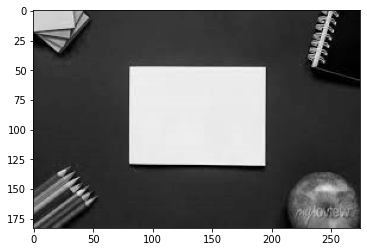

In [ ]:
plt.imshow(data_rgb)

#Формирование матрицы свертки

In [ ]:
k = 1/9 * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
#k = 1 * np.array([[1, 1, 1], [1, 20, 1], [1, 1, 1]])
#k = [[1,0,1,0,1],[0,1,0,1,0],[0,0,1,0,0],[0,1,0,1,0],[1,0,1,0,1]]
k

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

#Применение матрицы свертки

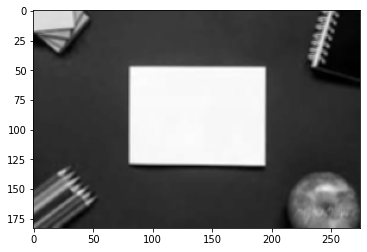

In [ ]:
#
result_after_matrix = ndimage.convolve(data_rgb, k)
plt.imshow(result_after_matrix)
plt.gray()

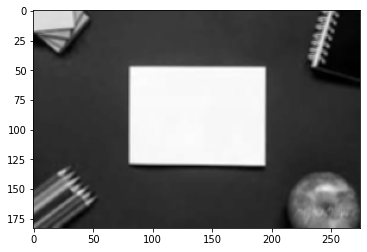

In [ ]:
#result_after_matrix это нумпай массив, убеждаемся в этому с помощью type(result_after_matrix) потом преобразуем его в image, чтобы работать с библиотекой pil, в result_after_matrix_2 сохраняем нумпай массив которым был рес
#потому что он нам понадобится для вставки в новую картинку
type(result_after_matrix)
result_after_matrix_2 = result_after_matrix
result_after_matrix = Image.fromarray(np.uint8(result_after_matrix))
plt.imshow(result_after_matrix)

Выделение границ

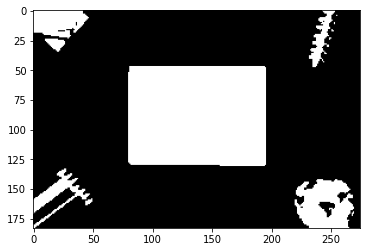

In [ ]:
image_gray = result_after_matrix.convert("L") #конвертация картинки в чб
image_gray.show()
threshold = 100 #устанавливаем порог относительно которого будем сравнивать значения пикселей
image_threshold = image_gray.point(
    lambda x: 255 if x > threshold else 0
)
image_threshold.show()
plt.imshow(image_threshold)

Преобразования(сжатие - удаляем ненужные белые фрагменты с изображения)

In [ ]:
def erode(cycles, image):
    for _ in range(cycles):
         image = image.filter(ImageFilter.MinFilter(3))
    return image

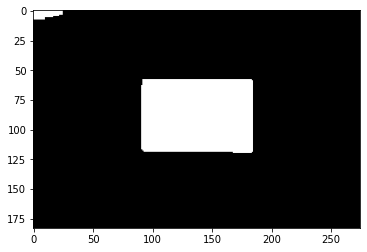

In [ ]:
step_1 = erode(11, image_threshold)
plt.imshow(step_1)

#Создание новой картинки

In [ ]:
b = Image.new(color=(0, 255, 0), size=(result_after_matrix_2.shape[1], result_after_matrix_2.shape[0]), mode='RGB')
q = ImageDraw.Draw(b)

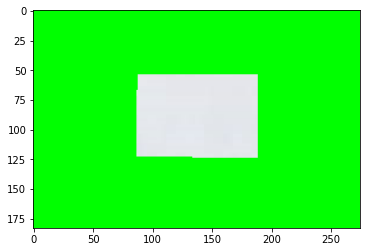

In [ ]:
image = image_orig#исходное изображение
image_founded = np.asarray(step_1)#преобразует в нумпай массив итоговое изображение степ1
w = np.asarray(image)
for x in range(image.size[1]):
  for y in range(image.size[0]):
    if abs(image_founded[x,y]):
      q.point((y, x), (w[x,y,0], w[x,y,1], w[x,y,2]))
    # иф проверяет что на степ1 не 0, а 1, и там где 1 то есть белое в эти координаты вставляет в новое изображение вырезанный белый объект

plt.imshow(b)